In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # converting text data into numerical feature vectors.
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC                               # Support Vector Classifier (SVC) algorithm for classification tasks
from sklearn.metrics import accuracy_score



In [ ]:
data = pd.read_csv('/content/mail_data.csv') # read data from CSV Files

In [26]:
print('Print All Data \n',(data)) # What type of data

Print All Data 
      Category                                            Message
0           1  Go until jurong point, crazy.. Available only ...
1           1                      Ok lar... Joking wif u oni...
2           0  Free entry in 2 a wkly comp to win FA Cup fina...
3           1  U dun say so early hor... U c already then say...
4           1  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        0  This is the 2nd time we have tried 2 contact u...
5568        1               Will ü b going to esplanade fr home?
5569        1  Pity, * was in mood for that. So...any other s...
5570        1  The guy did some bitching but I acted like i'd...
5571        1                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data.shape   # dimensions of the DataFrame

(5572, 2)

In [ ]:
email_data = data.where(pd.notnull(data), '')  # Handle missing or null values

In [ ]:
data.head(10) # display head

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
data.info() # display data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.loc[data['Category']    == 'spam', 'Category',] = 0  # assign numeric values to the 'Category' column
data.loc[data['Category']    == 'ham', 'Category',] = 1


In [ ]:
X = data['Message']         # independent variables
Y = data['Category']        # dependent variable


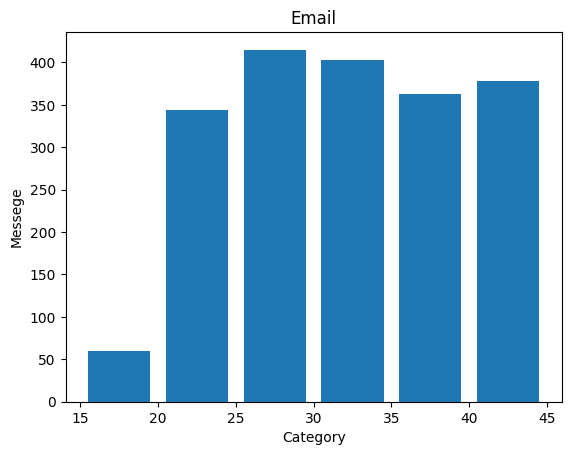

In [ ]:
Email = data['Message'].str.len() # Data Vizualization
bins = [15,20,25,30,35,40,45]
plt.hist(Email, bins, rwidth=0.8) #to set width
plt.title('Email')
plt.xlabel('Category')
plt.ylabel('Messege')
plt.show()

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
# split the data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

print(X.shape)      #   check the shape or dimensions of the variables
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [32]:

# method fits the vectorizer to the training data and transforms the training data into a matrix of TF-IDF features. X_train represent feature vector.
# method transforms the test data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)





In [ ]:
# converts the data type of the Y_train variable to integer.
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

print(X_train)
print(X_train_features)


3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3

In [30]:
model = SVC()                 # classification algorithm that uses support vectors to separate different classes in the data.
model.fit(X_train_features, Y_train)

SVC()

In [31]:

#  calculates the accuracy of the model's predictions on the training data.
print("Training Accuracy:", accuracy_score(Y_train, model.predict(X_train_features)))



Training Accuracy: 0.99798070450976


In [28]:
#  calculates the accuracy of the model's predictions on the Test data.
print("Test Accuracy:", accuracy_score(Y_test, model.predict(X_test_features)))


Test Accuracy: 0.979372197309417


In [27]:
#  email will be used as input to the model for prediction.
msg = ['This is the second time we have contacted your company regarding the system defect']
prediction = model.predict(feature_extraction.transform(msg))
print('Ham mail' if prediction[0] == 1 else 'Spam mail')


Ham mail
